<p><font size="6" color='grey'> <b>
Machine Learning
</b></font> </br></p>
<p><font size="5" color='grey'> <b>
Computer Vision - Convolutional Neural Network (CNN) - Fashion MNIST
</b></font> </br></p>

---

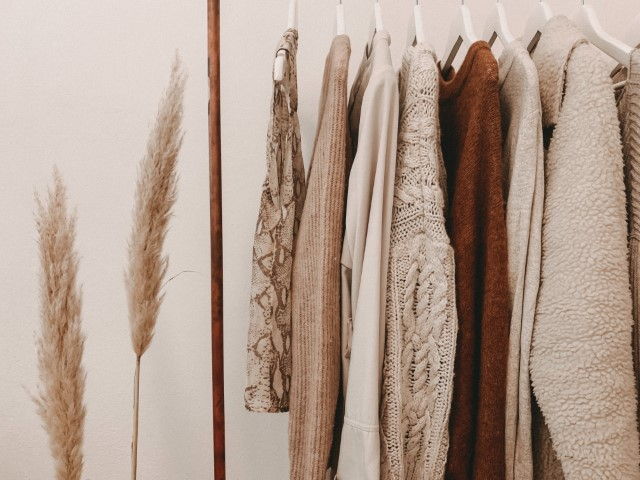

Foto von <a href="https://unsplash.com/@anotherlovely?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Alyssa Strohmann</a> auf <a href="https://unsplash.com/de/fotos/TS--uNw-JqE?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>
  

# **1 <font color='orange'>|</font> Understand**
---

<p><font color='black' size="5">
Warnungen ausschalten
</font></p>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

<p><font color='black' size="5">
Anwendungsfall
</font></p>

---   


Fashion-MNIST ist ein Datensatz von Zalandos Artikelbildern – bestehend aus einem Trainingsset mit 60.000 Beispielen und einem Testset mit 10.000 Beispielen. Jedes Beispiel ist ein 28x28-Graustufenbild, das einem Etikett aus 10 Klassen zugeordnet ist. Zalando beabsichtigt, dass Fashion-MNIST als direkter Drop-in-Ersatz für den ursprünglichen MNIST-Datensatz für das Benchmarking von Algorithmen für maschinelles Lernen dient. Es teilt die gleiche Bildgröße und Struktur der Trainings- und Testaufteilungen.


[Info](https://www.kaggle.com/datasets/zalando-research/fashionmnist)







In [ ]:
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
(data_train, target_train), (data_test, target_test) = keras.datasets.fashion_mnist.load_data()

In [ ]:
data_train.shape, target_train.shape, data_test.shape, target_test.shape


<p><font color='black' size="5">
Anzeigen eines Bildes als Matrix der Pixelwerte
</font></p>

In [ ]:
test_index = 42
image = pd.DataFrame(data_train[test_index])

In [ ]:
target_train[test_index]

In [ ]:
image.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(data_train[test_index].reshape((28,28)))

<p><font color='black' size="5">
Anzeigen der ersten 36 Bilder
</font></p>

In [ ]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(data_train[i].reshape((28,28)))
    label_index = int(target_train[i])
    plt.title(class_names[label_index])
plt.show()

<p><font color='black' size="5">
EDA (Exploratory Data Analysis) mit Numpy
</font></p>

In [ ]:
np.info(data_train)

In [ ]:
np.min(data_train), np.max(data_train)

In [ ]:
np.info(target_train)

In [ ]:
np.min(target_train), np.max(target_train)

# **2 <font color='orange'>|</font> Prepare**
---


<p><font color='black' size="5">
Skalieren der Daten (0,1)
</font></p>

In [ ]:
data_train = data_train.astype("float32") / 255
data_test = data_test.astype("float32") / 255

In [ ]:
data_train.shape

<p><font color='black' size="5">
Moellparameter & Konvertierung eines Klassenvektors (Ganzzahlen) in eine binäre Klassenmatrix (Output)
</font></p>

In [ ]:
num_classes = 10
input_shape = (28, 28, 1)

In [ ]:
target_train = keras.utils.to_categorical(target_train, num_classes)
target_test = keras.utils.to_categorical(target_test, num_classes)

# **3 <font color='orange'>|</font> Modeling**
---

<p><font color='black' size="5">
Schrittweise Modellierung eines Neuronalen Netzes
</font></p>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense

In [ ]:
import tensorflow as tf
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

In [ ]:
model = Sequential()
model.add(Input(shape=input_shape))
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation="softmax"))

<p><font color='black' size="5">
Einfaches Layer-Diagramm
</font></p>

In [ ]:
model.summary()

<p><font color='black' size="5">
Compile & Training
</font></p>

In [ ]:
batch_size = 256
epochs = 15

In [ ]:
%%time
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(data_train, target_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

In [ ]:
print(model.history.params)
print(model.history.history.keys())

In [ ]:
import plotly.express as px
title_ = 'Loss-Entwicklung'
px.line(y=model.history.history['loss'], title=title_, labels={'x':'Epochen', 'y':'Loss-Wert'}, width=800, height=400)

# **4 <font color='orange'>|</font> Evaluate**
---

<p><font color='black' size="5">
Prognose
</font></p>

In [ ]:
target_train_pred = model.predict(data_train)
target_test_pred = model.predict(data_test)

<p><font color='black' size="5">
Accuracy
</font></p>

In [ ]:
# --- Vorverarbeitung: Umwandlung Array mit Wahrscheinlichkeiten in Array mit 0/1
import numpy as np
def probabilities_to_binary(matrix):
    max_indices = tf.keras.backend.argmax(matrix, axis=1)
    binary_matrix = tf.keras.backend.one_hot(max_indices, matrix.shape[1])
    return binary_matrix

In [ ]:
from sklearn.metrics import accuracy_score
target_train_pred_ = probabilities_to_binary(target_train_pred)
acc_train = accuracy_score(target_train, target_train_pred_) * 100
print (f"Modell: {model} -- Train -- Accuracy: {acc_train:5.2f}")

In [ ]:
target_test_pred_ = probabilities_to_binary(target_test_pred)
acc_test = accuracy_score(target_test, target_test_pred_) * 100
print (f"Modell: {model} -- Test -- Accuracy: {acc_test:5.2f}")

# **5 <font color='orange'>|</font> Deploy**
---